# Assignment 13

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
penguins = sns.load_dataset("penguins")

## species VS sex

I don't expect there to be a correlation between the two columns

In [3]:
conTable = penguins.groupby(["species", "sex"]).size().unstack("sex")
conTable

sex        Female  Male
species                
Adelie         73    73
Chinstrap      34    34
Gentoo         58    61

<AxesSubplot:xlabel='species'>

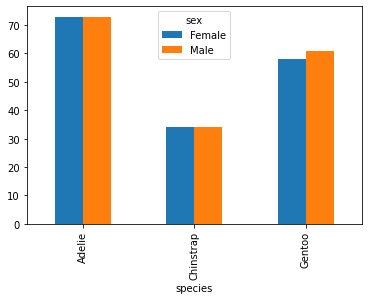

In [4]:
conTable.plot(kind="bar")

In [5]:
chi2_contingency(conTable)

(0.04860717014078318,
 0.9759893689765846,
 2,
 array([[72.34234234, 73.65765766],
        [33.69369369, 34.30630631],
        [58.96396396, 60.03603604]]))

Based on the chi squared test there is a very high likelyhood that these two columns are related. However i think i'd be interesting if there were more fields of data to test this on.

## island VS sex

In [6]:
conTable = penguins.groupby(["island", "sex"]).size().unstack("sex")
conTable

sex        Female  Male
island                 
Biscoe         80    83
Dream          61    62
Torgersen      24    23

<AxesSubplot:xlabel='island'>

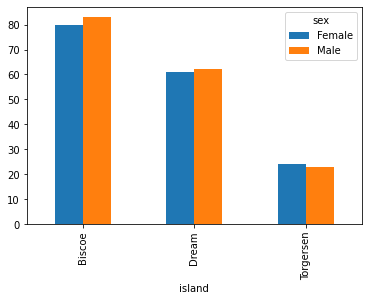

In [7]:
conTable.plot(kind="bar")

In [8]:
chi2_contingency(conTable)

(0.05759904881286207,
 0.971611229281065,
 2,
 array([[80.76576577, 82.23423423],
        [60.94594595, 62.05405405],
        [23.28828829, 23.71171171]]))

# Assignment 14

In [9]:
vgSales = pd.read_csv("../Assignment 4/vgsales.csv")
vgSales.head()

Rank                           Name                      basename  \
0     1                     Wii Sports                    wii-sports   
1     2              Super Mario Bros.              super-mario-bros   
2     3                 Mario Kart Wii                mario-kart-wii   
3     4  PlayerUnknown's Battlegrounds  playerunknowns-battlegrounds   
4     5              Wii Sports Resort             wii-sports-resort   

      Genre ESRB_Rating Platform         Publisher         Developer  \
0    Sports           E      Wii          Nintendo      Nintendo EAD   
1  Platform         NaN      NES          Nintendo      Nintendo EAD   
2    Racing           E      Wii          Nintendo      Nintendo EAD   
3   Shooter         NaN       PC  PUBG Corporation  PUBG Corporation   
4    Sports           E      Wii          Nintendo      Nintendo EAD   

   VGChartz_Score  Critic_Score  ...  NA_Sales  PAL_Sales  JP_Sales  \
0             NaN           7.7  ...       NaN        NaN       NaN   
1             NaN          10.0  ...       NaN        NaN       NaN   
2             NaN           8.2  ...       NaN        NaN       NaN   
3             NaN           NaN  ...       NaN        NaN       NaN   
4             NaN           8.0  ...       NaN        NaN       NaN   

   Other_Sales    Year  Last_Update  \
0          NaN  2006.0          NaN   
1          NaN  1985.0          NaN   
2          NaN  2008.0  11th Apr 18   
3          NaN  2017.0  13th Nov 18   
4          NaN  2009.0          NaN   

                                                 url  status Vgchartzscore  \
0  http://www.vgchartz.com/game/2667/wii-sports/?...       1           NaN   
1  http://www.vgchartz.com/game/6455/super-mario-...       1           NaN   
2  http://www.vgchartz.com/game/6968/mario-kart-w...       1           8.7   
3  http://www.vgchartz.com/game/215988/playerunkn...       1           NaN   
4  http://www.vgchartz.com/game/24656/wii-sports-...       1           8.8   

                                         img_url  
0  /games/boxart/full_2258645AmericaFrontccc.jpg  
1                   /games/boxart/8972270ccc.jpg  
2  /games/boxart/full_8932480AmericaFrontccc.jpg  
3  /games/boxart/full_8052843AmericaFrontccc.jpg  
4  /games/boxart/full_7295041AmericaFrontccc.jpg  

[5 rows x 23 columns]

In [10]:
conTable = vgSales.groupby(["Genre", "ESRB_Rating"]).size().unstack(fill_value=0)
conTable

ESRB_Rating       AO     E  E10  EC  KA     M  RP     T
Genre                                                  
Action             1   844  617   7   0   924  73  1081
Action-Adventure   0    15  119   0   0   139  22    73
Adventure         10   567  272   6   0   337  25   456
Board Game         0     1    0   0   0     0   3     0
Education          0     2    0   0   0     0   0     0
Fighting           0    90   53   1   1   114  11   774
MMO                0     0    0   0   0    10   1    23
Misc               5  1175  210  37   1    66  23   372
Music              0    27   51   0   0     0   1    51
Party              0    13   15   0   0     0   1     4
Platform           0  1177  359   0   0    12   8   164
Puzzle             0  1230  102   1   0     5  13    35
Racing             0  1437  194   0   0    33  17   296
Role-Playing       1   261  251   0   0   432  52   843
Sandbox            0     0    1   0   0     0   0     3
Shooter            0   335  160   0   0  1105  58   803
Simulation         1   773  118   1   0    23   8   352
Sports             0  2450  153   1   1    22  27   280
Strategy           1   414  221   0   0    74  21   538
Visual Novel       0     0    1   0   0    18   4     9

<AxesSubplot:xlabel='Genre'>

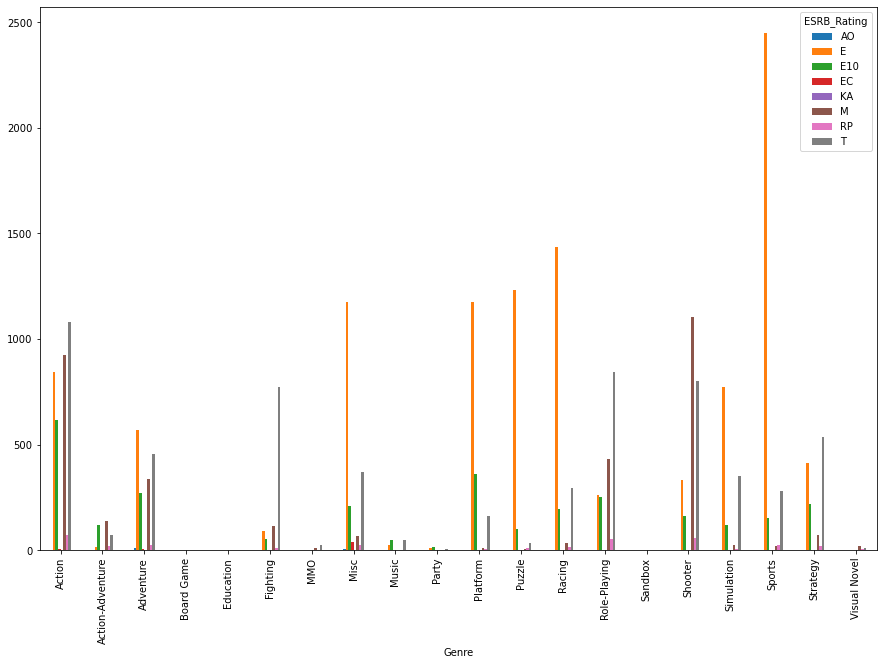

In [11]:
conTable.plot(kind="bar", figsize=(15,10))

In [12]:
chi2_contingency(conTable)

(11592.522910672213,
 0.0,
 133,
 array([[2.85285527e+00, 1.62327465e+03, 4.34985353e+02, 8.10811497e+00,
         4.50450832e-01, 4.97598019e+02, 5.52553020e+01, 9.24475257e+02],
        [2.95982729e-01, 1.68414173e+02, 4.51295771e+01, 8.41214071e-01,
         4.67341151e-02, 5.16256191e+01, 5.73271811e+00, 9.59139821e+01],
        [1.34559539e+00, 7.65643779e+02, 2.05167887e+02, 3.82432375e+00,
         2.12462431e-01, 2.34700165e+02, 2.60620582e+01, 4.36043729e+02],
        [3.21720357e-03, 1.83058883e+00, 4.90538882e-01, 9.14363121e-03,
         5.07979511e-04, 5.61148034e-01, 6.23121534e-02, 1.04254328e+00],
        [1.60860179e-03, 9.15294416e-01, 2.45269441e-01, 4.57181560e-03,
         2.53989756e-04, 2.80574017e-01, 3.11560767e-02, 5.21271642e-01],
        [8.39690132e-01, 4.77783685e+02, 1.28030648e+02, 2.38648774e+00,
         1.32582652e-01, 1.46459637e+02, 1.62634720e+01, 2.72103797e+02],
        [2.73462304e-02, 1.55600051e+01, 4.16958049e+00, 7.77208653e-02,
         4.3

The chi2 test says that there is no correlation between them. Which i agree with, it can be noted that genre's like shooters and action games often have a mature rating and that sports games almost always have a Everyone rating.